# Final Project MA705, Fall 2024

Due: May 1, 2025, 11:59pm

# Introduction 

The Academy Awards (Oscars) represent one of the most prestigious recognitions in the film industry. Recognition at the Oscars can significantly elevate a film's visibility, enhance a studios reputation, and bring long-term commercial performance. For a new film production company aiming to gain prestige, understanding what kinds of films are most likely to win Oscars is a vital strategic consideration.  

## Research Question 

How does film’s genre influence the likelihood of winning an Oscar, and does this relationship vary across award categories? 

## Scenario: 

As a data analyst for a new production company, you are tasked with helping the executive team decide which types of films to invest in. The team’s goal is to increase the studio’s prestige and visibility. Recent industry reports suggest that earning an Academy Award nomination or win can significantly impact a studio’s reputation and audience reach, while also balancing the need for commercial success. The executives have allocated a budget specifically for an Oscars campaign, including marketing efforts, red carpet appearances, and promotional materials, and are seeking data-driven insights on which film genres and award categories would best maximize their chances of success during awards season. 

### One-line summary:

They’ve asked you to analyze whether certain film genres are more likely to earn Oscar nominations or wins, and which award categories are most associated with each genre's success.

# Data Preparation

Dataset 1 - Oscar nominations (and wins) Kaggle Load in the Oscar Awards dataset. 

In [1]:
import pandas as pd
oscars = pd.read_csv('/work/the_oscar_award.csv')
oscars = oscars.dropna(subset=['film'])
oscars

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
...,...,...,...,...,...,...,...,...
11101,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Sean Baker,Anora,True
11102,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Brady Corbet/Mona Fastvold,The Brutalist,False
11103,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Jesse Eisenberg,A Real Pain,False
11104,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Moritz Binder/Tim Fehlbaum/Alex David,September 5,False


Dataset 1 - building a subset, this is what we will be using from now on. We built a subset of the data only including recent awards (where film release date is from 1990 to 2024). Focused the analysis to maintain relevance to current Academy voting patterns and trends. 

In [2]:
oscarsrecent = oscars[
    (oscars["year_film"] >= 1990) 
]
oscarsrecent

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
6929,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Kevin Costner,Dances With Wolves,False
6930,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Robert De Niro,Awakenings,False
6931,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Gerard Depardieu,Cyrano de Bergerac,False
6932,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Richard Harris,The Field,False
6933,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Jeremy Irons,Reversal of Fortune,True
...,...,...,...,...,...,...,...,...
11101,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Sean Baker,Anora,True
11102,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Brady Corbet/Mona Fastvold,The Brutalist,False
11103,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Jesse Eisenberg,A Real Pain,False
11104,2024,2025,97,WRITING (Original Screenplay),WRITING (Original Screenplay),Moritz Binder/Tim Fehlbaum/Alex David,September 5,False


Dataset 2 - Genres IMDb. Extracted film genre information by web scraping IMDb data and loading in the dataset.

In [3]:
moviegenres = pd.read_csv('/work/movies_genres.csv')
moviegenres

,film,IMDb ID,Genres
0,Dances With Wolves,tt0099348,"Adventure, Western, Drama"
1,Awakenings,tt0099077,"Biography, Drama"
2,Cyrano de Bergerac,tt0099334,"History, Drama, Comedy, Romance"
3,The Field,tt0099566,"Thriller, Drama"
4,Reversal of Fortune,tt0100486,"Biography, Mystery, Drama"
...,...,...,...
1906,The Man Who Could Not Remain Silent,tt20519854,"Drama, Short, History"
1907,Alien: Romulus,tt18412256,"Horror, Thriller, Sci-Fi"
1908,Better Man,tt14260836,"Biography, Fantasy, Musical, Music"
1909,Kingdom of the Planet of the Apes,tt11389872,"Drama, Action, Thriller, Adventure, Sci-Fi"


Remove rows where the 'Genres' column has NaN values

In [4]:
moviegenres_cleaned = moviegenres.dropna(subset=['Genres'])

Dataset 2 - Dictionary of missing values

In [5]:
dict_of_missing = {
    "Grasshoppers (Cavallette)": ("tt0099696", "Animation, Short, Comedy, History, War"),
    "Senzeni Na? (What Have We Done?)": ("tt0100579", "Short"),
    "Birdnesters of Thailand (aka 'Shadow Hunters')": ("tt0101457", "Documentary, Short"),
    "Reci, Reci, Reci... (Words, Words, Words)": ("tt0105224", "Animation, Short"),
    "Black Rider (Schwarzfahrer)": ("tt0108056", "Short, Comedy, Drama"),
    "The Screw (La Vis)": ("tt0108498", "Short"),
    "89mm od Europy (89mm from Europe)": ("tt0109023", "Documentary, Short"),
    "Fiddlefest--Roberta Tzavaras and Her East Harlem Violin Program": ("tt0117669", "Documentary, Biography, Music"),
    "La Vieille Dame et les Pigeons (The Old Lady and the Pigeons)": ("tt0127710", "Animation, Short, Comedy, Drama"),
    "Election Night (Valgaften)": ("tt0189179", "Short, Comedy"),
    "La Carte Postale (The Postcard)": ("tt0188485", "Family, Short, Drama"),
    "Bror, Min Bror (Teis and Nico)": ("tt0191850", "Short, Family"),
    "Kleingeld (Small Change)": ("tt0200780", "Short, Drama"),
    "A Soccer Story (Uma Historia de Futebol)": ("tt0207112", "Short, Sport"),
    "A Man Thing (Meska Sprawa)": ("tt0304394", "Drama, Short"),
    "I'll Wait for the Next One... (J'Attendrai Le Suivant...)": ("tt0325638", "Comedy, Short, Romance"),
    "Inja (Dog)": ("tt0303350", "Drama, Short"),
    "This Charming Man (Der Er En Yndig Mand)": ("tt0340071", "Comedy, Short"),
    "Die Rote Jacke (The Red Jacket)": ("tt0323844", "Short, Drama"),
    "Most (The Bridge)": ("tt0345672", "Short, Drama"),
    "(A) Torzija [(A) Torsion]": ("tt0350476", "Short, Drama"),
    "The Chorus (Les Choristes)": ("tt0372824", "Drama, Music"),
    "7:35 in the Morning (7:35 de la Mañana)": ("tt0406501", "Musical, Short"),
    "Wallace & Gromit in The Curse of the Were-Rabbit": ("tt0312004", "Animation, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"),
    "Sophie Scholl - The Final Days": ("tt0426578", "Biography, Crime, Drama, History, Thriller, War"),
    "Ausreisser (The Runaway)": ("tt0452139", "Short"),
    "Days of Glory (Indigènes)": ("tt0444182", "Drama, War"),
    "Binta and the Great Idea (Binta Y La Gran Idea)": ("tt0442001", "Drama, Family, Short"),
    "Éramos Pocos (One Too Many)": ("tt0460616", "Short, Comedy"),
    "Borat Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan": ("tt0443453", "Comedy"),
    "Même les Pigeons Vont au Paradis (Even Pigeons Go to Heaven)": ("tt1066329", "Animation, Short, Comedy, Drama, Fantasy, Sci-Fi"),
    "My Love (Moya Lyubov)": ("tt0874952", "Animation, Short, Drama, Romance"),
    "Il Supplente (The Substitute)": ("tt0922627", "Short, Comedy"),
    "Le Mozart des Pickpockets (The Mozart of Pickpockets)": ("tt0820971", "Short, Comedy, Crime"),
    "Auf der Strecke (On the Line)": ("tt23812414", "Short, Drama"),
    "Spielzeugland (Toyland)": ("tt1280548", "Short, Drama, War"),
    "La Corona (The Crown)": ("tt1157626", "Documentary, Short"),
    "Outside the Law (Hors-la-loi)": ("tt1229381", "Crime, Drama, War"),
    "Madagascar, carnet de voyage (Madagascar, a Journey Diary)": ("tt1590114", "Animation, Short, Adventure"),
    "Dimanche/Sunday": ("tt1895334", "Animation, Short"),
    'Maggie Simpson in "The Longest Daycare"': ("tt2175842", "Animation, Short, Comedy, Family"),
    "Death of a Shadow (Dood van een Schaduw)": ("tt2312702", "Short, Drama, Fantasy, Romance, War"),
    "Aquel No Era Yo (That Wasn't Me)": ("tt2372213", "Short, Drama, War"),
    "Avant Que De Tout Perdre (Just before Losing Everything)": ("tt2689992", "Short, Drama, Family, Thriller"),
    "Pitääkö Mun Kaikki Hoitaa? (Do I Have to Take Care of Everything?)": ("tt2256646", "Short, Comedy, Drama, Family"),
    "The Reaper (La Parka)": ("tt3438472", "Documentary, Short, Biography"),
    "Glen Campbell...I'll Be Me": ("tt2049586", "Documentary, Biography, Family, Music"),
    "Butter Lamp (La Lampe Au Beurre De Yak)": ("tt2922078", "Short, Family"),
    "Everything Will Be Okay (Alles Wird Gut)": ("tt4324518", "Short, Drama, Thriller"),
    "Watu Wote/All of Us": ("tt6333422", "Short, Drama"),
    "Dcera (Daughter)": ("tt10923134", "Animation, Short, Drama, Family, Fantasy"),
}

Dataset 2 - merging the dictionary of missing values with moviegenres_cleaned, then updating moviegenres

In [6]:
# Create a Dataframe from dict_of_missing
missing_rows_df = pd.DataFrame([(film, imdb_id, genres) for film, (imdb_id, genres) in dict_of_missing.items()],
                               columns=['film', 'IMDb ID', 'Genres'])

# Ensure missing_rows_df has the same columns as moviegenres_cleaned
for col in moviegenres_cleaned.columns:
    if col not in missing_rows_df.columns:
        missing_rows_df[col] = None

# Concat
moviegenres = pd.concat([moviegenres_cleaned, missing_rows_df], ignore_index=True)
moviegenres

,film,IMDb ID,Genres
0,Dances With Wolves,tt0099348,"Adventure, Western, Drama"
1,Awakenings,tt0099077,"Biography, Drama"
2,Cyrano de Bergerac,tt0099334,"History, Drama, Comedy, Romance"
3,The Field,tt0099566,"Thriller, Drama"
4,Reversal of Fortune,tt0100486,"Biography, Mystery, Drama"
...,...,...,...
1906,Glen Campbell...I'll Be Me,tt2049586,"Documentary, Biography, Family, Music"
1907,Butter Lamp (La Lampe Au Beurre De Yak),tt2922078,"Short, Family"
1908,Everything Will Be Okay (Alles Wird Gut),tt4324518,"Short, Drama, Thriller"
1909,Watu Wote/All of Us,tt6333422,"Short, Drama"


## Merge the two data sets

In [7]:
df = pd.merge(oscarsrecent, moviegenres, on='film', how='inner')
df

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner,IMDb ID,Genres
0,1990,1991,63,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Kevin Costner,Dances With Wolves,False,tt0099348,"Adventure, Western, Drama"
1,1990,1991,63,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Graham Greene,Dances With Wolves,False,tt0099348,"Adventure, Western, Drama"
2,1990,1991,63,ACTRESS IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,Mary McDonnell,Dances With Wolves,False,tt0099348,"Adventure, Western, Drama"
3,1990,1991,63,ART DIRECTION,ART DIRECTION,Jeffrey Beecroft/Lisa Dean,Dances With Wolves,False,tt0099348,"Adventure, Western, Drama"
4,1990,1991,63,CINEMATOGRAPHY,CINEMATOGRAPHY,Dean Semler,Dances With Wolves,True,tt0099348,"Adventure, Western, Drama"
...,...,...,...,...,...,...,...,...,...,...
4021,2024,2025,97,SHORT FILM (Live Action),SHORT FILM (Live Action),Nebojša Slijepcevic/Danijel Pek,The Man Who Could Not Remain Silent,False,tt20519854,"Drama, Short, History"
4022,2024,2025,97,VISUAL EFFECTS,VISUAL EFFECTS,Eric Barba/Nelson Sepulveda-Fauser/Daniel Maca...,Alien: Romulus,False,tt18412256,"Horror, Thriller, Sci-Fi"
4023,2024,2025,97,VISUAL EFFECTS,VISUAL EFFECTS,Luke Millar/David Clayton/Keith Herft/Peter St...,Better Man,False,tt14260836,"Biography, Fantasy, Musical, Music"
4024,2024,2025,97,VISUAL EFFECTS,VISUAL EFFECTS,Erik Winquist/Stephen Unterfranz/Paul Story/Ro...,Kingdom of the Planet of the Apes,False,tt11389872,"Drama, Action, Thriller, Adventure, Sci-Fi"


## Verify the merge

Checking the row count: expectation is 4026

 This will confirm that we got the same number of rows as are in the (left) "oscarsrecent" dataset. This means there were no extra rows added, or any missing ones after the merge.

In [8]:
print(f"Final number of rows in moviegenres: {len(df)}")

Final number of rows in moviegenres: 4026


Checking the column count: expectation is 10

This will confirm that we have the number of rows we expected from before. 8 from the left, and 3 from the right, merging on 1 column (film). That means there are no extra columns added or any missing after the merge.

In [9]:
num_columns = df.shape[1]
print(f"Final number of columns in df: {num_columns}")

Final number of columns in df: 10


Checking for rows with missing genres: expectation zero

This will confirm that we successfully merged the dictionary of missing values with the "moviegenres" dataset.

In [10]:
null_genres_count = moviegenres['Genres'].isna().sum()
print(f"Number of rows with missing Genres: {null_genres_count}")

Number of rows with missing Genres: 0


## Export the merged dataset

export to CSV as we do not have complex datatypes

In [11]:
df.to_csv('Final_Project_merged_df.csv', index=False, header=True)

# Final Results and Analyses - Chi Square (significance test) & Phi Coefficient (effect size)

In [12]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Statisical test & output

In [13]:
all_genres = []  # Start with an empty list

for genre_string in df['Genres']:  # Go through each row in the Genres column
    genre_list = genre_string.split(',')  # Split on commas
    for g in genre_list:
        cleaned = g.strip()  # Remove spaces at the start and end (if any)
        if cleaned and cleaned not in all_genres:  # Make sure it's not empty and not already in the list
            all_genres.append(cleaned)


# Create a boolean column for each genre (True if the genre is in the string, False otherwise)
for genre in all_genres:
    column_name = "is_" + genre
    genre_column = []  # This will hold True/False values for each row

    for i in range(len(df)):
        genre_string = df.loc[i, 'Genres']
        if genre in genre_string:
            genre_column.append(True)
        else:
            genre_column.append(False)

    df[column_name] = genre_column

# Find the genres that appear more than 20 times
top_genres = []
for genre in all_genres:
    column_name = "is_" + genre
    count = df[column_name].sum()  # Sums up the number of True values
    if count > 20:
        top_genres.append(genre)


def analyze_genre_performance_by_category():
    results = []
    all_categories = df['canon_category'].unique()

    for genre in top_genres:
        genre_col = "is_" + genre

        for i in range(len(all_categories)):
            category = all_categories[i]
            category_df = df[df['canon_category'] == category]

            if len(category_df) < 10:
                continue

            # Split into with_genre and without_genre
            with_genre = category_df[category_df[genre_col] == True]
            without_genre = category_df[category_df[genre_col] == False]

            if len(with_genre) < 5 or len(without_genre) < 5:
                continue

            # Calculate win rates
            win_rate_with = with_genre['winner'].mean()
            win_rate_without = without_genre['winner'].mean()

            # Create contingency table
            wins_with = with_genre['winner'].sum()
            losses_with = len(with_genre) - wins_with

            wins_without = without_genre['winner'].sum()
            losses_without = len(without_genre) - wins_without

            contingency = [
                [wins_with, losses_with],
                [wins_without, losses_without]
            ]

            try:
                # Statistical test
                chi2, p_value, _, _ = chi2_contingency(contingency)
                total_n = wins_with + losses_with + wins_without + losses_without
                phi = np.sqrt(chi2 / total_n)

                result_row = {}  # Build row as dictionary
                result_row['genre'] = genre
                result_row['category'] = category
                result_row['nominations_with_genre'] = len(with_genre)
                result_row['win_rate_without_genre'] = win_rate_without
                result_row['win_rate_with_genre'] = win_rate_with
                result_row['win_rate_difference'] = win_rate_with - win_rate_without
                result_row['p_value'] = p_value
                result_row['significant'] = p_value < 0.05
                result_row['effect_size'] = phi

                results.append(result_row)

            except:
                pass

    return pd.DataFrame(results)


# Run the analysis and filter for significant findings
genre_analysis = analyze_genre_performance_by_category()
significant_advantages = (genre_analysis[(genre_analysis['significant']) & 
                                        (genre_analysis['win_rate_difference'] > 0)]
                         .sort_values('effect_size', ascending=False))

pd.set_option('display.width', 1000) # Fix that stupid text wrapping in the output

print("Genres with Significant Advantages in Specific Categories:")
print(significant_advantages[['genre', 'category', 'win_rate_without_genre', 
                             'win_rate_with_genre', 'win_rate_difference', 
                             'p_value', 'effect_size']])

Genres with Significant Advantages in Specific Categories:
         genre                      category  win_rate_without_genre  win_rate_with_genre  win_rate_difference   p_value  effect_size
341      Sport         DOCUMENTARY (Feature)                0.169697             0.700000             0.530303  0.000249     0.276956
53       Drama                VISUAL EFFECTS                0.170732             0.408163             0.237432  0.005213     0.244077
309        War                 SOUND EDITING                0.222222             0.529412             0.307190  0.018899     0.217962
28     Western                     DIRECTING                0.182353             0.800000             0.617647  0.004570     0.214373
22   Adventure         ANIMATED FEATURE FILM                0.045455             0.280488             0.235033  0.041509     0.199882
246      Music        MUSIC (Original Score)                0.176829             0.545455             0.368625  0.010183     0.194239
74 

Nomination Distribution and Win Significance for Top 6 Genres

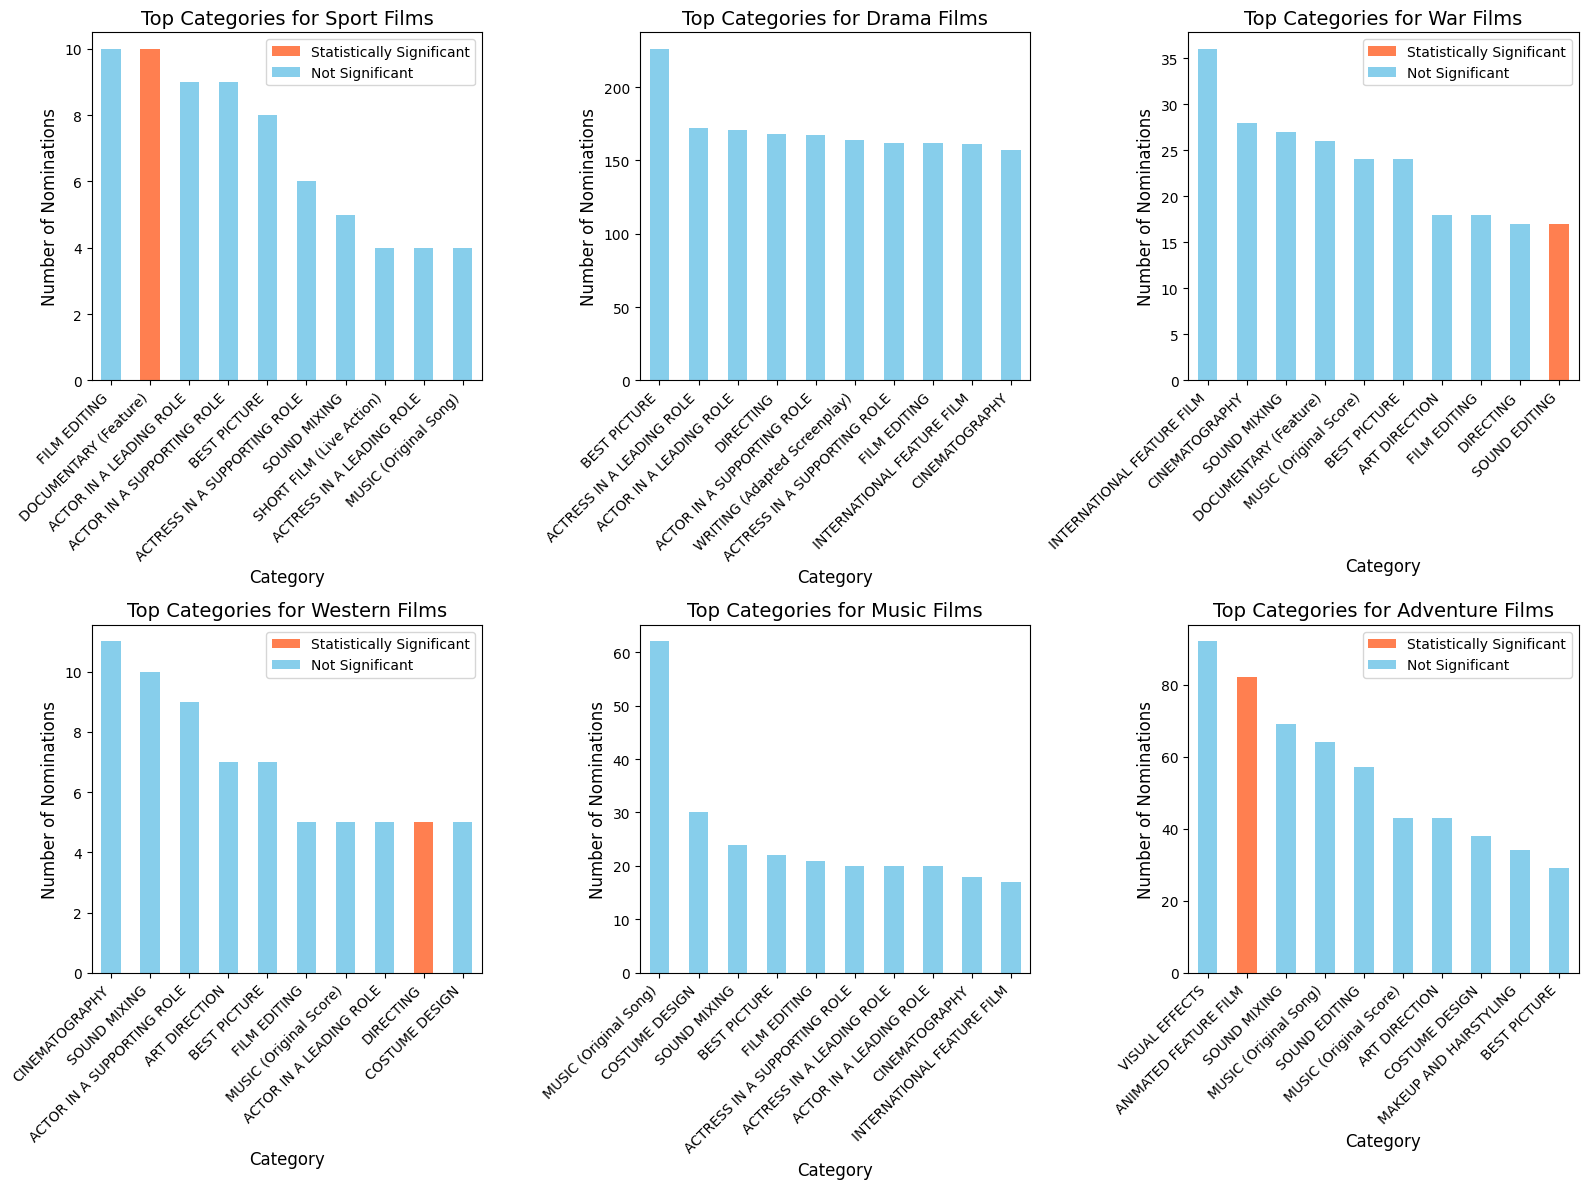

In [14]:
# Get the top 6 genres with the highest average effect size
top_genres_by_effect = (
    significant_advantages
    .groupby('genre')['effect_size']
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
    .tolist()
)

# This helps identify which categories each genre tends to be nominated in
category_genre_counts = {}
for genre in top_genres:
    genre_col = f'is_{genre}'
    genre_df = df[df[genre_col] == 1]
    category_counts = genre_df['canon_category'].value_counts().head(10)
    category_genre_counts[genre] = category_counts

# Create a set of significant genre-category pairs for quick lookup
significant_pairs = set(zip(significant_advantages['genre'], significant_advantages['category']))

plt.figure(figsize=(16, 12))
for i, genre in enumerate(top_genres_by_effect):
    plt.subplot(2, 3, i+1)
    
    # Get the data for this genre
    genre_data = category_genre_counts[genre]
    
    # Create colors list - default is 'skyblue', significant is 'coral'
    colors = ['coral' if (genre, category) in significant_pairs else 'skyblue' 
              for category in genre_data.index]
    
    # Plot with custom colors
    genre_data.plot(kind='bar', color=colors)
    
    plt.title(f'Top Categories for {genre} Films', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Nominations', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add a legend if there are both significant and non-significant bars
    if any(c == 'coral' for c in colors):
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='coral', label='Statistically Significant'),
            Patch(facecolor='skyblue', label='Not Significant')
        ]
        plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.savefig('Nomination_Distribution_and_Win_Significance_for_Top_6_Genres.png', dpi=300, bbox_inches='tight')

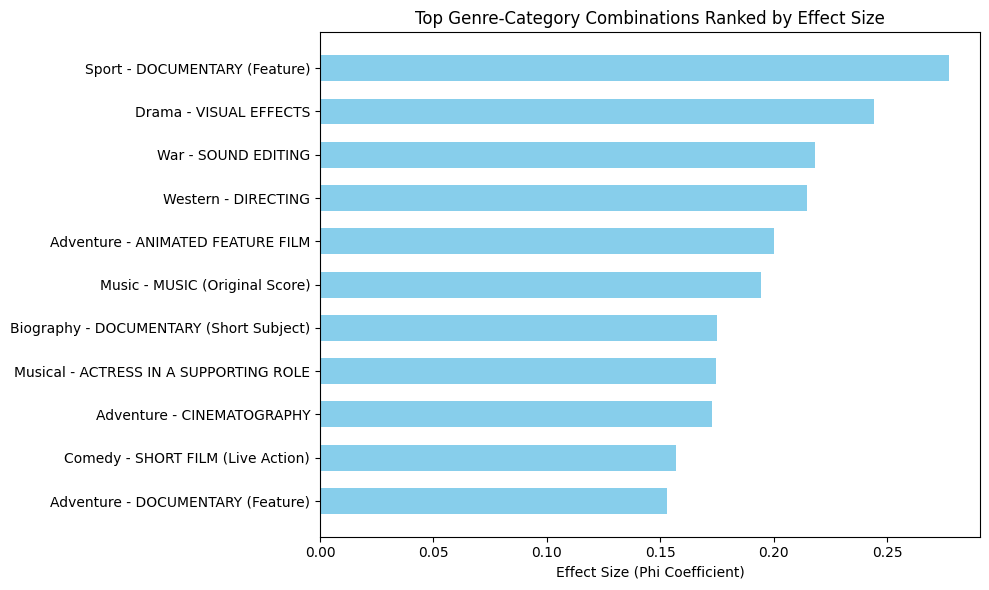

In [15]:
# Sort by effect size (descending)
top = significant_advantages.sort_values('effect_size', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    y=top['genre'] + " - " + top['category'],
    width=top['effect_size'],
    color='skyblue',
    height=0.6  # thicker bars
)

ax.invert_yaxis()
ax.set_xlabel("Effect Size (Phi Coefficient)")
ax.set_title("Top Genre-Category Combinations Ranked by Effect Size")
plt.tight_layout()
 
plt.savefig('Top_Genre-Category_Combinations_Ranked_by_Effect_Size.png', dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_236/743302951.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


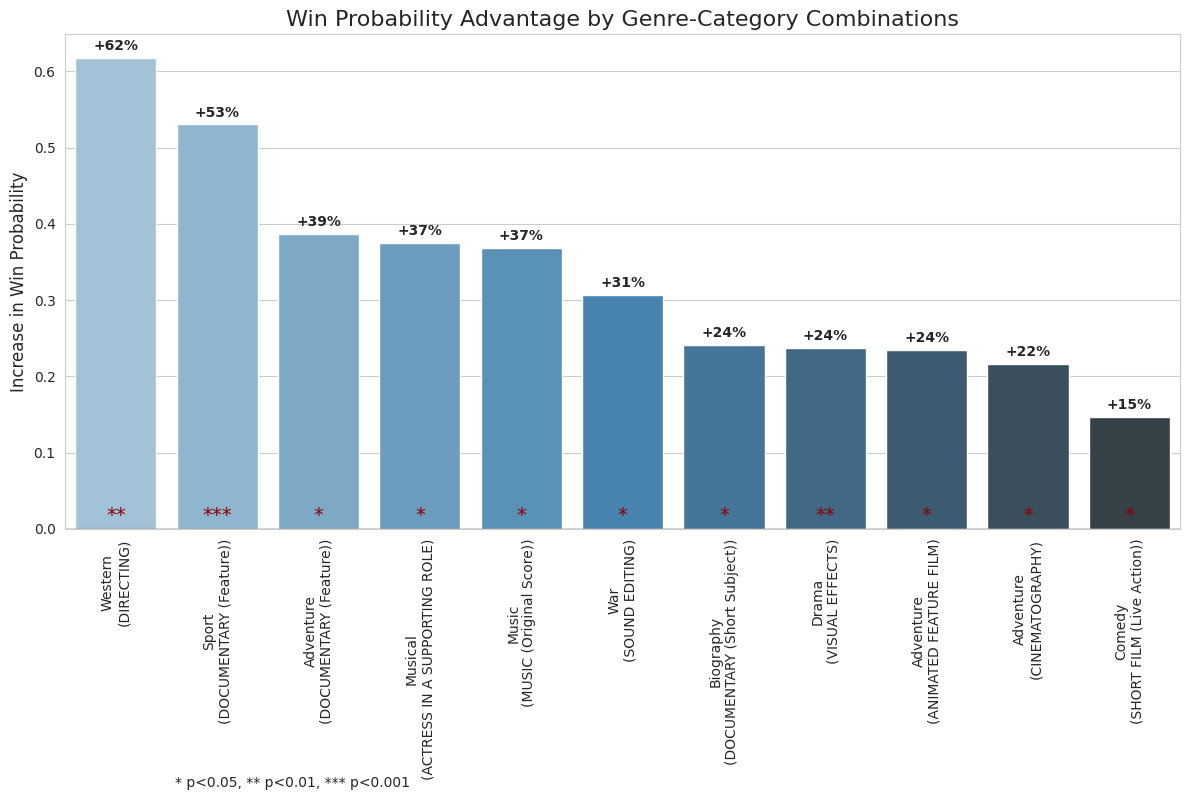

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genre_advantages(significant_advantages):
    # Sort by win rate difference and take top results
    plot_data = significant_advantages.sort_values('win_rate_difference', ascending=False)

    # Create readable labels combining genres and categories
    plot_data['label'] = plot_data['genre'] + '\n(' + plot_data['category'] + ')'
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Create the bar plot
    ax = sns.barplot(
        x='label',
        y='win_rate_difference',
        data=plot_data,
        palette='Blues_d'
    )
    
    # Add percentage labels on top of each bar
    for i, bar in enumerate(ax.patches):
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            bar.get_height() + 0.01,
            f"+{plot_data['win_rate_difference'].iloc[i]:.0%}",
            ha='center',
            fontweight='bold'
        )
    
    # Add p-value indicators with stars
    for i, p in enumerate(plot_data['p_value']):
        stars = ''
        if p < 0.001:
            stars = '***'
        elif p < 0.01:
            stars = '**'
        elif p < 0.05:
            stars = '*'
            
        if stars:
            ax.text(
                i,
                0.01,
                stars,
                ha='center',
                fontsize=14,
                color='darkred'
            )
    
  # Add chart elements
    plt.title('Win Probability Advantage by Genre-Category Combinations', fontsize=16)
    plt.ylabel('Increase in Win Probability', fontsize=12)
    plt.xlabel('')
    
    # Rotate x-axis labels 90 degrees
    plt.xticks(rotation=90)
    
    # Add a legend for significance
    plt.figtext(0.15, 0.01, "* p<0.05, ** p<0.01, *** p<0.001", ha="left")
    
    # Add a horizontal reference line at zero
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    
plot_genre_advantages(significant_advantages)

plt.savefig('Win_Probability_Advantage_by_Genre-Category_Combinations.png', dpi=300, bbox_inches='tight')